Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 9 - Regressão Logística (Parte 2)

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---

Concluindo esta atividade você se tornará apto a ser um mestre Pokemon! Vamos ensinar o computador a reconhecer qual o tipo de cada Pokemon. 

<img src='https://tm.ibxk.com.br/2019/09/30/30091641838086.jpg?ims=1120x420' width=500>

Para esta atividade vamos focar apenas em três tipos, grama, fogo e água. Fique a vontade para treinar o seu modelo para reconhecer mais tipos, assim você pode ganhar insignias nos ginásios com maior facilidade (o professor de vocês não tem nada melhor para fazer mesmo...)

É necessário instalar algumas bibliotecas antes de executar a célula abaixo com êxito, busque na internet como fazer isso dependendo do erro que você obter.

In [1]:
# Importe aqui as bibliotecas necessárias
import pandas as pd
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

### 1) Carregue a base de dados com os metadados de todos os Pokemons

Coloque como índice a coluna `pokedex_number`, ela é como o CPF de cada Pokemon.

In [2]:
df = pd.read_csv('dados/pokemon.csv', index_col='pokedex_number')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


Veja aqui quais são as colunas existentes.

In [3]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Note que o tipo primário de cada pokemon é chamado de `type1`. Mostre aqui os seus valores únicos.

In [4]:
df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

Crie um `DataFrame` com as colunas `type1` e `name` sendo a colúna índice o `pokedex_number`.

In [5]:
poke_map = pd.DataFrame(data=df[['type1', 'name']], index=df.index)
poke_map.head()

,type1,name
pokedex_number,,
1,grass,Bulbasaur
2,grass,Ivysaur
3,grass,Venusaur
4,fire,Charmander
5,fire,Charmeleon


### 2) Carregue a base de dados de imagens dos Pokemons

Use esta função auxiliar para carregar a base de dados de imagens. Note que aqui usamos o OpenCV para ler as imagens, e também fazer um pré-processamento. Aqui fazemos a verredura de um diretório inteiro lendo todos os seus arquivos!

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img_256x256 =  cv2.resize(img, (256,256))
            images.append(cv2.cvtColor(img_256x256, cv2.COLOR_BGR2RGB))
    return images

Utilize a função auxiliar e salve o resultado em uma lista chamada `imagens`. Ela é uma lista de matrizes do numpy.

In [7]:
imagens = load_images_from_folder('dados/Pokemon_Images')

Execute o bloco para testar se as imagens foram lidas corretamente. Aqui temos apenas uma amostragem de todas as imagens.

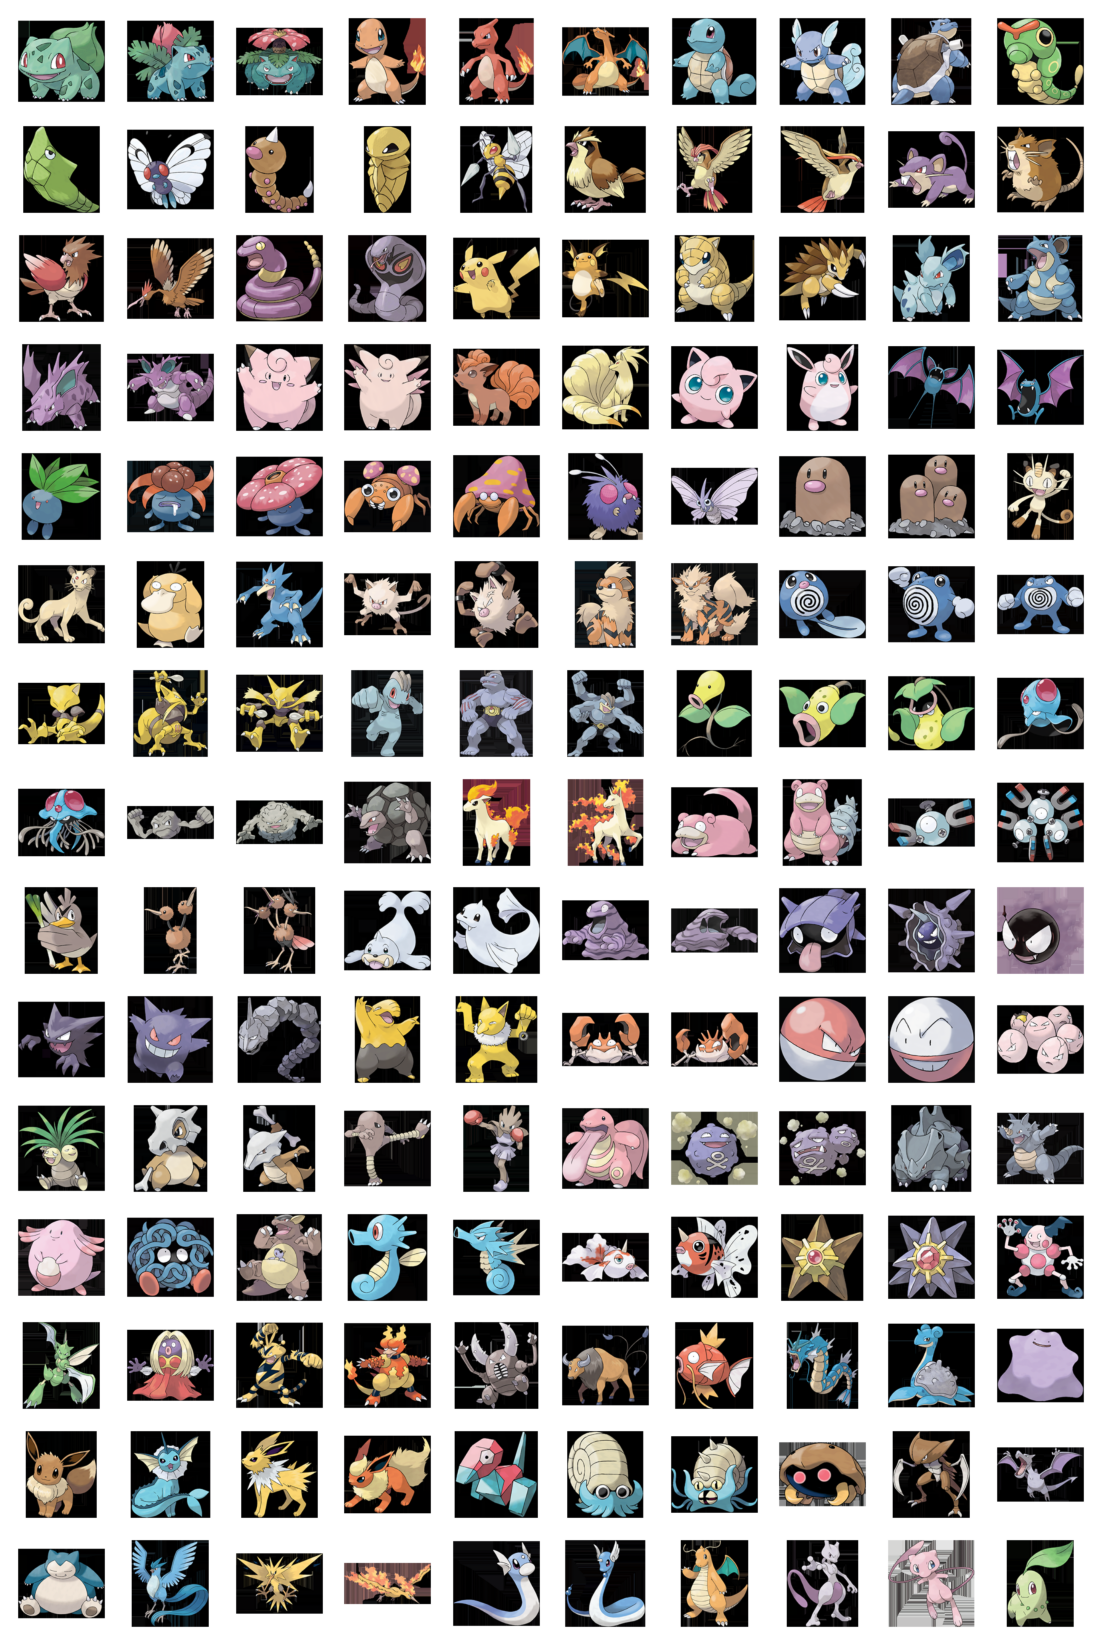

In [8]:
fig = plt.figure(figsize=(20,30))
grid = ImageGrid(fig,111,
                 nrows_ncols=(15, 10),  
                 axes_pad=0,  
                 )

for ax, im in zip(grid, imagens):
    ax.imshow(im)
    ax.axis('off')

plt.show()

Note que as imagens, que estão em `jpg` possuem um fundo preto circundando o Pokemon, além de termos uma tarja branca nas fotos. Para a classificação vamos despresar estes valores que são comuns em todas as fotos e não servem para a classificação.

Substitua agora `img` que não foi definida ainda, por alguma imagem que está na lista de imagens e faça um histograma para as cores da imagem. Note que no histograma eu não coloquei as bordas (branco e preto) tente incluí-las para ver o que acontece.

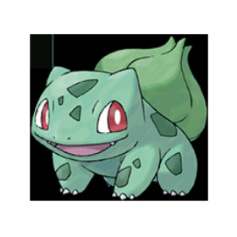

In [9]:
# Escolhendo primeira imagem da lista
img =  imagens[0]

# Plotando visualização da imagem
plt.figure(figsize=(4, 6))
plt.imshow(img)
plt.axis('off');

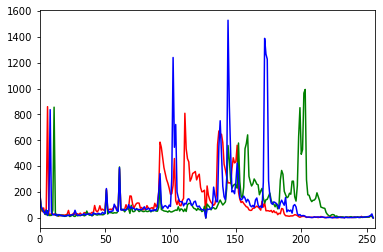

In [10]:
# Calcular o histograma para cada canal
colors = ('r','g','b')
# Para cada canal: calcular o histograma e adicionar à lista de features
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img], # Imagem
                            [i], # Índice do canal
                            None, # Sem usar máscara
                            [256], # Tamanho do histograma
                            [1,255]) # Range - Removendo o preto e o branco para uma melhor visualização!!!
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()

### 3) Criando os Embeddings

Como já falamos em processamento de textos, é possível criar uma representação de algo complexo (um espaço vetorial grande) em um menor que seja representativo. A isto damo o nome de Embeddings, que é algo comum em aplicações de Aprendizagem de máquina.

Use a função auxiliar abaixo para a criação dos Embeddings das fotos dos Pokemons.

In [11]:
def embeddings(img):
    # Criar uma lista para o valor dos atributos
    features = []
    # Para cada canal: calcular o histograma e adicionar à lista de features
    for i in range(3):
        histogram, bin_edges = np.histogram(
            img[:, :, i], bins=10, range=(1, 255) # remover o preto e o branco (coloquei só 10 bins para cada canal de cor)
        )
        features.append(histogram)

    # Criar um vetor para as features (concatenação dos histogramas)
    return np.array(features).flatten().astype(int)

No código abaixo eu apenas preenchi o esqueleto do DataFrame, preenchendo ele com zeros.

Coloque como coluna índice `pokedex_number` e sobreescreva cada linha com os embeddings para as cores.

In [12]:
df2 = pd.DataFrame(
    [embeddings(img_) for img_ in imagens[:len(df)]],
    index=df.index
) # (coloquei só 10 bins para cada canal de cor)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,1872,1146,2700,4821,7252,8790,1994,645,124,26990,...,1794,751,2225,2506,4962,8346,6847,1834,118,27000
2,2696,1644,4101,6222,4600,4463,724,872,937,27274,...,2423,791,1777,1911,7163,2322,5084,5166,364,26730
3,4188,1874,6233,3150,2070,1826,777,1621,2116,33615,...,4133,1116,2752,3775,4043,4585,2183,1641,251,32983
4,2300,491,713,504,1385,4035,1205,3085,3200,35830,...,2253,874,5608,1924,7902,1443,691,1682,1663,28541
5,3078,522,692,484,797,4988,1913,3823,5040,32164,...,3214,843,7609,4017,4257,950,745,1394,460,29800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2617,4579,3568,1773,973,1864,23980,1171,547,24462,...,2013,5507,3568,1799,998,16183,10330,382,714,24041
798,15159,596,862,715,1120,2619,2167,1456,2875,36620,...,14345,627,1264,1137,1617,2225,1909,1320,3612,35222
799,15853,4508,1610,8884,8170,473,71,423,159,25374,...,15812,4569,1648,1563,15478,1090,12,10,2,25332


Execute as células abaixo para normalizar o DataFrame. Não use normalização na coluna alvo.

In [13]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df2)  
transformer

Normalizer()

In [14]:
df2 = pd.DataFrame( transformer.transform(df2) , columns=df2.columns)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.036242,0.022187,0.052272,0.093335,0.140400,0.170175,0.038604,0.012487,0.002401,0.522529,...,0.034732,0.014539,0.043076,0.048516,0.096065,0.161579,0.132559,0.035506,0.002284,0.522723
1,0.053621,0.032698,0.081565,0.123750,0.091490,0.088765,0.014400,0.017343,0.018636,0.542454,...,0.048191,0.015732,0.035343,0.038008,0.142465,0.046182,0.101116,0.102747,0.007240,0.531634
2,0.070151,0.031390,0.104406,0.052764,0.034674,0.030586,0.013015,0.027153,0.035444,0.563068,...,0.069230,0.018694,0.046097,0.063233,0.067722,0.076801,0.036566,0.027488,0.004204,0.552482
3,0.040434,0.008632,0.012535,0.008860,0.024348,0.070936,0.021184,0.054235,0.056256,0.629895,...,0.039608,0.015365,0.098589,0.033824,0.138918,0.025368,0.012148,0.029570,0.029236,0.501754
4,0.055395,0.009394,0.012454,0.008711,0.014344,0.089769,0.034428,0.068803,0.090705,0.578856,...,0.057842,0.015171,0.136939,0.072294,0.076613,0.017097,0.013408,0.025088,0.008279,0.536311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.046112,0.080682,0.062869,0.031240,0.017144,0.032844,0.422530,0.020633,0.009638,0.431023,...,0.035469,0.097034,0.062869,0.031699,0.017585,0.285146,0.182016,0.006731,0.012581,0.423605
797,0.223119,0.008772,0.012687,0.010524,0.016485,0.038548,0.031895,0.021430,0.042316,0.538995,...,0.211138,0.009229,0.018604,0.016735,0.023800,0.032749,0.028098,0.019429,0.053164,0.518418
798,0.276320,0.078575,0.028063,0.154849,0.142404,0.008244,0.001238,0.007373,0.002771,0.442272,...,0.275605,0.079638,0.028725,0.027243,0.269784,0.018999,0.000209,0.000174,0.000035,0.441540
799,0.093099,0.014801,0.045202,0.085682,0.025595,0.011375,0.009047,0.012623,0.024614,0.553970,...,0.101697,0.007218,0.017346,0.043406,0.020606,0.096309,0.029669,0.006270,0.005222,0.559126


Agora acrescente uma coluna de `classe` e copie os valores de `type1` do primeiro DataFrame.

In [15]:
df2['classe'] = df['type1'].values

Use o método `isin()` do Pandas para filtrar apenas as correspondências da lista abaixo em `df2`.

In [16]:
filtro = ['grass', 'fire', 'water']

df2[df2.classe.isin(filtro)]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,classe
0,0.036242,0.022187,0.052272,0.093335,0.140400,0.170175,0.038604,0.012487,0.002401,0.522529,...,0.014539,0.043076,0.048516,0.096065,0.161579,0.132559,0.035506,0.002284,0.522723,grass
1,0.053621,0.032698,0.081565,0.123750,0.091490,0.088765,0.014400,0.017343,0.018636,0.542454,...,0.015732,0.035343,0.038008,0.142465,0.046182,0.101116,0.102747,0.007240,0.531634,grass
2,0.070151,0.031390,0.104406,0.052764,0.034674,0.030586,0.013015,0.027153,0.035444,0.563068,...,0.018694,0.046097,0.063233,0.067722,0.076801,0.036566,0.027488,0.004204,0.552482,grass
3,0.040434,0.008632,0.012535,0.008860,0.024348,0.070936,0.021184,0.054235,0.056256,0.629895,...,0.015365,0.098589,0.033824,0.138918,0.025368,0.012148,0.029570,0.029236,0.501754,fire
4,0.055395,0.009394,0.012454,0.008711,0.014344,0.089769,0.034428,0.068803,0.090705,0.578856,...,0.015171,0.136939,0.072294,0.076613,0.017097,0.013408,0.025088,0.008279,0.536311,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.024747,0.005464,0.008683,0.015169,0.023836,0.067709,0.039413,0.018953,0.042318,0.572449,...,0.006077,0.030588,0.034027,0.019895,0.024841,0.074414,0.014792,0.027479,0.562211,fire
778,0.070055,0.010735,0.025192,0.043698,0.018628,0.020755,0.022432,0.011615,0.098723,0.590602,...,0.012821,0.028055,0.055946,0.051304,0.024722,0.041469,0.014743,0.098090,0.513002,water
786,0.038315,0.050382,0.024810,0.028537,0.014078,0.019210,0.135976,0.026162,0.015551,0.572214,...,0.028104,0.029005,0.142494,0.062639,0.068048,0.021880,0.004802,0.001855,0.530501,grass
787,0.108580,0.054214,0.039658,0.049271,0.019447,0.022029,0.026309,0.025256,0.019005,0.561312,...,0.068005,0.047114,0.046639,0.032983,0.013197,0.017511,0.018988,0.014810,0.553602,water


Faça agora a fatorização da coluna `classes` para transformar seus valores em categorias.

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
enconder = OrdinalEncoder(dtype='int64')

In [19]:
df2['classe'] = enconder.fit_transform(df2[['classe']])

### 4) Divisão dos dados

Divida os dados em 20% para teste.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop('classe', axis=1), df2['classe'],
    test_size=0.2,
    stratify=df2['classe'],
    random_state=42
)

Execute a célula abaixo para conferir se a mesma proporção de treino e teste foi respeitada:

In [22]:
aux1 = y_train.value_counts().sort_values(ascending=False)
aux2 = y_test.value_counts().sort_values(ascending=False)

aux1 = aux1/sum(aux1) * 100
aux2 = aux2/sum(aux2) * 100

# Imprir de forma tabelada para comparação
pd.concat([aux1, aux2], axis=1)

,classe,classe
17,14.21875,14.285714
12,13.12500,13.043478
9,9.68750,9.937888
0,9.06250,8.695652
6,6.56250,6.211180
14,6.56250,6.832298
15,5.62500,5.590062
3,4.84375,4.968944
13,4.06250,3.726708
10,4.06250,3.726708


Podemos confirmar que cada conjunto de dados tem uma distribuição semelhante de classes, portanto, ao treinar a regressão logística, poderemos generalizar e reduzir o risco de overfitting aos dados de treinamento! 

### 5) Faça agora a validação cruzada

Para melhorar a performance do seu modelo faça a validação cruzada com 5 folds e use um limite de 1000 iterações.

In [23]:
from sklearn.linear_model import LogisticRegressionCV

In [24]:
model = LogisticRegressionCV(cv=5, max_iter=1000)

In [25]:
model.fit(X_train, y_train)

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

LogisticRegressionCV(cv=5, max_iter=1000)

Veja agora quão bom ficou o seu modelo com o `classification_report`.

In [26]:
from sklearn.metrics import classification_report

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.33      0.20      0.25        10
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
           9       0.15      0.12      0.14        16
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         5
          12       0.13      0.29      0.18        21
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         5
          17       0.12    

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parabéns, você ensinou ao computador a identificar Pokemons de água, fogo e grama! 

## Rascunho

In [29]:
len(imagens)

887

In [30]:
fn = os.listdir('dados/Pokemon_Images')

In [31]:
import re
fn_parsed = [re.findall('\d{3}-(.+)\..+', i)[0] for i in fn]

In [32]:
df['filename_parsed'] = fn_parsed[:len(df)]

In [33]:
df[~(df['filename_parsed'] == df.name)][['name', 'filename_parsed']]

,name,filename_parsed
pokedex_number,,
29,Nidoran♀,Nidoran╬ô├û├ç
32,Nidoran♂,Nidoran╬ô├û├®
83,Farfetch'd,Farfetchd
669,Flabébé,FlabeÔòá├╝beÔòá├╝
772,Type: Null,Type-Null


In [34]:
len(df)

801